# Regressão Logística
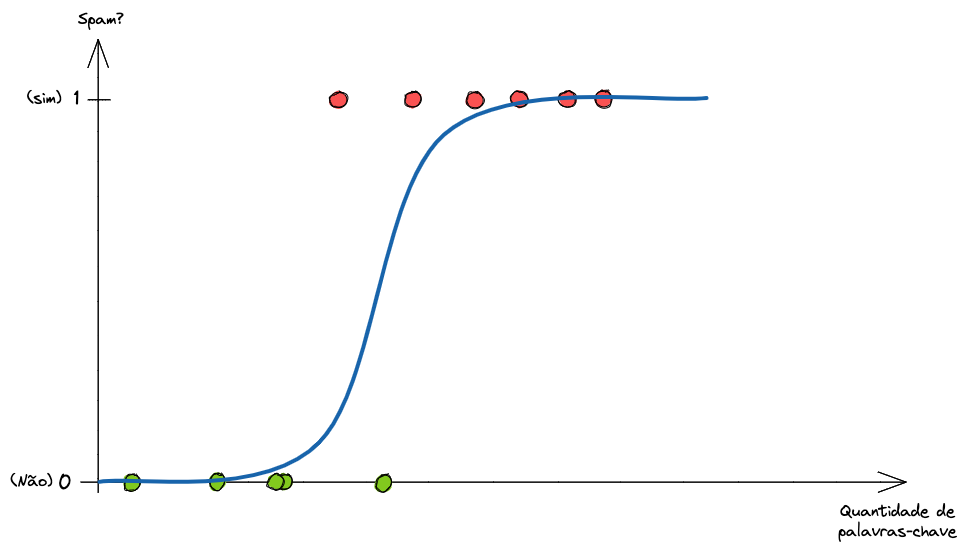
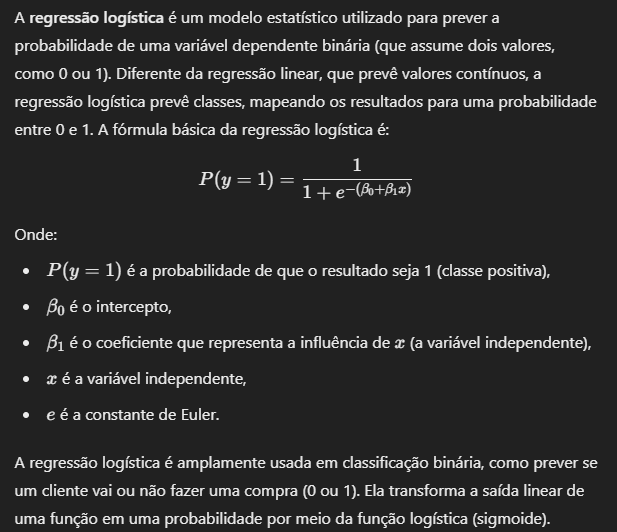

In [138]:
import pandas as pd
dados = pd.read_csv('train.csv')

In [139]:
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
dados.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

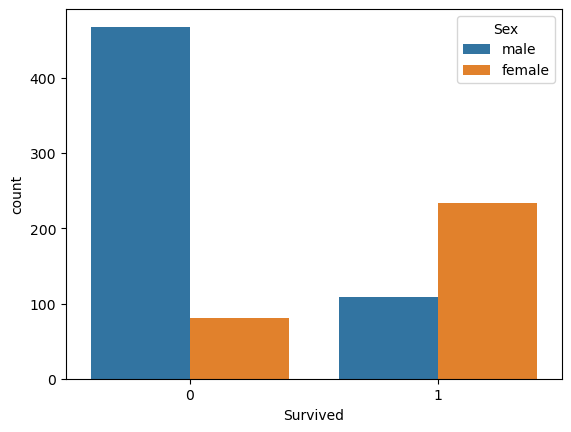

In [141]:
import seaborn as sb

sb.countplot(x='Survived', data=dados, hue='Sex')

In [142]:
dados.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

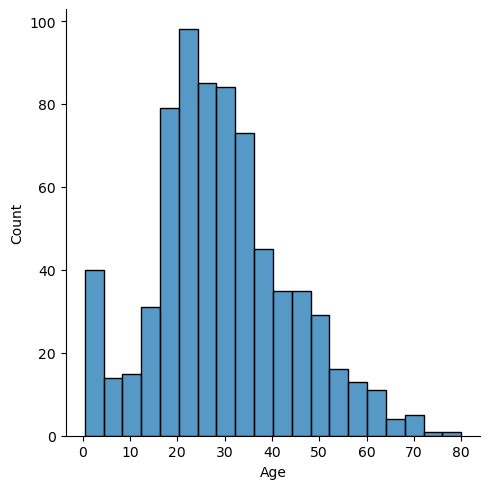

In [143]:
sb.displot(x='Age', data=dados)

In [144]:
dados['Age'] = dados['Age'].fillna(dados['Age'].mean())

In [145]:
dados.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [146]:
dados = dados.drop(['Cabin'], axis=1)
dados.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [147]:
dados = dados.dropna()

In [148]:
dados.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [149]:
dados.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [150]:
dados = dados.drop(['PassengerId', 'Name','Ticket'], axis=1)

In [151]:
dados.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [152]:
dummies_sex = pd.get_dummies(dados['Sex'], drop_first=True, dtype='int')

In [153]:
dados = dados.join(dummies_sex)
dados = dados.drop(['Sex'], axis=1)

In [154]:
dados.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


<Axes: xlabel='Survived', ylabel='count'>

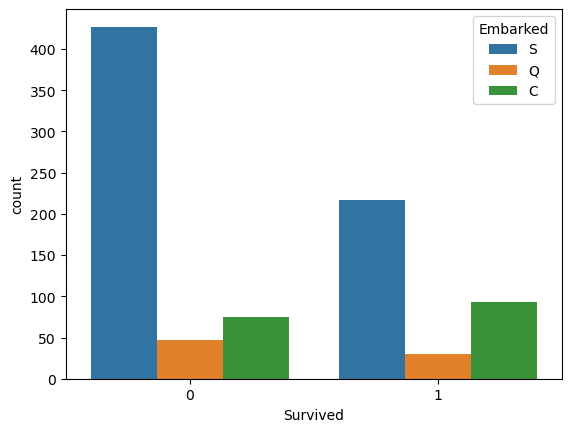

In [155]:
sb.countplot(x='Survived', data=dados, hue='Embarked')

In [156]:
dummies_embarked = pd.get_dummies(dados['Embarked'], drop_first=True, dtype='int')

In [157]:
dados = dados.join(dummies_embarked)
dados = dados.drop(['Embarked'], axis=1)

In [158]:
dados.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


<Axes: >

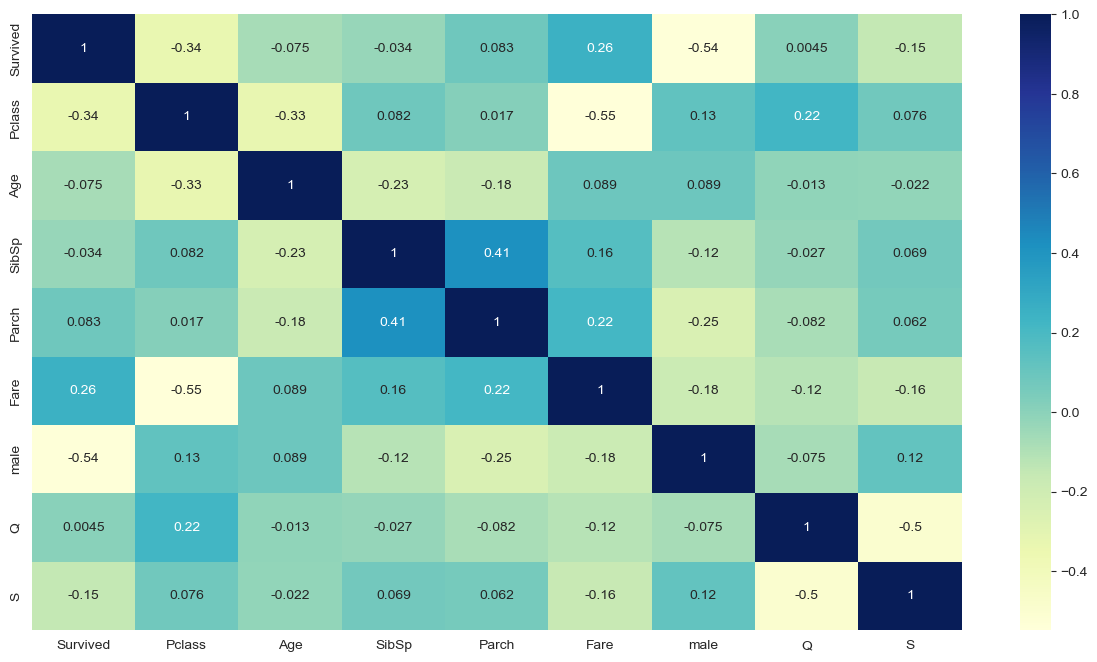

In [185]:
sb.set({'figure.figsize':(15,8)})
sb.heatmap(dados.corr(), annot=True, cmap='YlGnBu')

<Axes: xlabel='Survived', ylabel='count'>

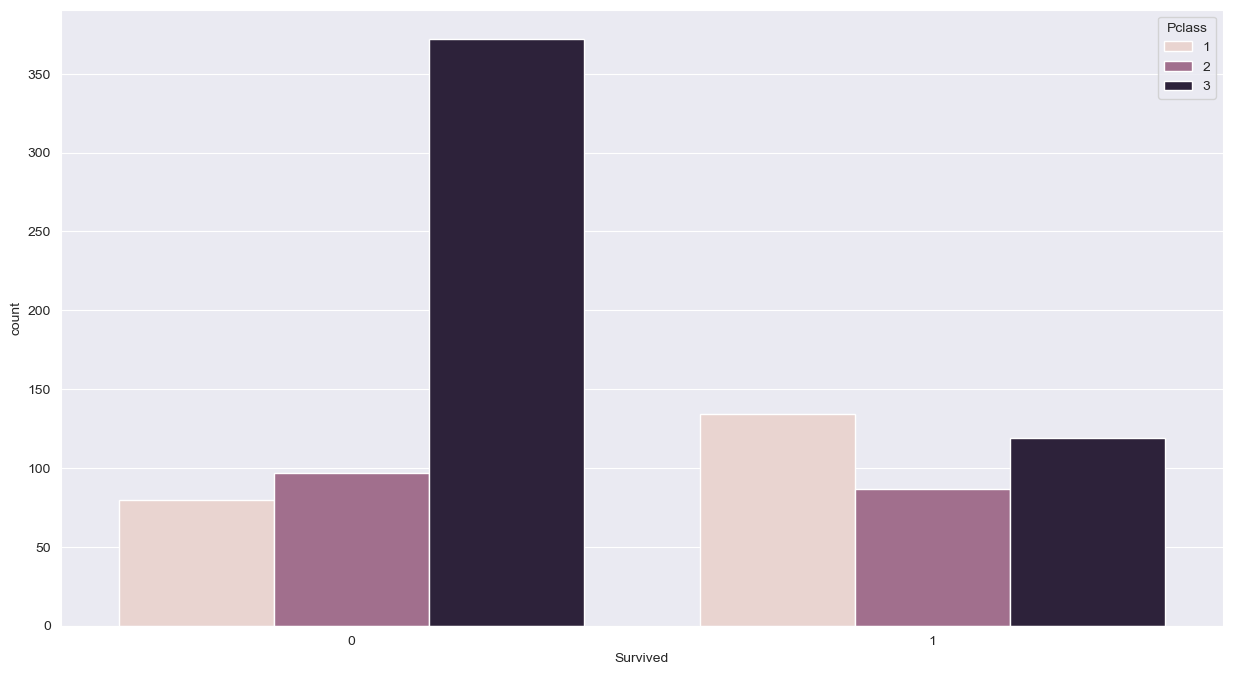

In [191]:
sb.countplot(x='Survived', data=dados, hue='Pclass')

## Preparando treinamento

In [196]:
X = dados.drop(['Survived'], axis=1)
y = dados['Survived']

In [198]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [206]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_ent, y_ent)

LogisticRegression(max_iter=1000)

In [208]:
predicao = model.predict(X_pru)

In [212]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pru, predicao)

0.7808988764044944

In [218]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicao))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       102
           1       0.78      0.67      0.72        76

    accuracy                           0.78       178
   macro avg       0.78      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [226]:
from sklearn.metrics import confusion_matrix

matriz_c = confusion_matrix(y_pru, predicao)
matriz_c

array([[88, 14],
       [25, 51]], dtype=int64)

In [228]:
pd.DataFrame(matriz_c, columns=['Pred: Não', 'Pred: Sim'], index=['Real: Não', 'Real: Sim'])

,Pred: Não,Pred: Sim
Real: Não,88,14
Real: Sim,25,51


In [230]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [250]:
nova_pessoa = [1, 35, 0, 0, 10, 1, 0, 0]
df_nova_pessoa = pd.DataFrame([nova_pessoa], columns=X.columns)

predicao_pessoa = model.predict(df_nova_pessoa)

resultado = "Sobrevivel" if predicao_pessoa[0] == 1 else 'Morreu'
print(resultado)

Morreu
